In [202]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")


In [162]:
book_train = pd.read_excel('Data_Train.xlsx')
book_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [210]:
test_data = pd.read_excel('Data_Test.xlsx')
test_data.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"


In [163]:
book_train.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [211]:
test_data.dtypes

Title           object
Author          object
Edition         object
Reviews         object
Ratings         object
Synopsis        object
Genre           object
BookCategory    object
dtype: object

In [164]:
book_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [165]:
book_train.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [166]:
book_train.shape

(6237, 9)

In [186]:
book_train.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [168]:
cat_cols = [cat for cat in book_train.columns if cat not in book_train._get_numeric_data().columns]
cat_cols

['Title',
 'Author',
 'Edition',
 'Reviews',
 'Ratings',
 'Synopsis',
 'Genre',
 'BookCategory']

In [169]:
for cat in cat_cols:
    print(f'Unique values for {cat} are {len(book_train[cat].unique())}')

Unique values for Title are 5568
Unique values for Author are 3679
Unique values for Edition are 3370
Unique values for Reviews are 36
Unique values for Ratings are 342
Unique values for Synopsis are 5549
Unique values for Genre are 345
Unique values for BookCategory are 11


## Reviews

In [170]:
book_train.Reviews.value_counts()

5.0 out of 5 stars    1375
4.0 out of 5 stars     570
4.5 out of 5 stars     507
4.6 out of 5 stars     394
4.4 out of 5 stars     389
4.3 out of 5 stars     359
4.7 out of 5 stars     343
4.2 out of 5 stars     324
4.1 out of 5 stars     310
3.9 out of 5 stars     241
4.8 out of 5 stars     222
3.8 out of 5 stars     190
3.7 out of 5 stars     167
3.0 out of 5 stars     138
3.5 out of 5 stars     115
3.6 out of 5 stars     110
4.9 out of 5 stars      75
3.4 out of 5 stars      75
3.3 out of 5 stars      57
1.0 out of 5 stars      49
3.1 out of 5 stars      49
3.2 out of 5 stars      41
2.0 out of 5 stars      39
2.9 out of 5 stars      26
2.5 out of 5 stars      18
2.7 out of 5 stars      16
2.8 out of 5 stars      10
2.3 out of 5 stars       7
1.5 out of 5 stars       5
2.6 out of 5 stars       4
2.4 out of 5 stars       4
2.2 out of 5 stars       3
1.4 out of 5 stars       2
1.7 out of 5 stars       1
1.6 out of 5 stars       1
2.1 out of 5 stars       1
Name: Reviews, dtype: int64

In [171]:
book_train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [172]:
book_train.Reviews = book_train.Reviews.str.split().str[0]

In [212]:
test_data.Reviews = test_data.Reviews.str.split().str[0]

In [173]:
book_train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [174]:
book_train.Reviews = book_train.Reviews.astype('float64')

In [213]:
test_data.Reviews = test_data.Reviews.astype('float64')

## Ratings

In [175]:
book_train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [ ]:
book_train.Ratings = book_train.Ratings.str.split().str[0]

In [214]:
test_data.Ratings = test_data.Ratings.str.split().str[0]

In [177]:
book_train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [178]:
book_train.Ratings.unique()

array(['8', '14', '6', '13', '1', '72', '16', '111', '132', '17', '4',
       '3', '5', '2', '23', '76', '10', '9', '15', '34', '32', '49', '62',
       '61', '7', '18', '98', '12', '97', '285', '29', '27', '267', '24',
       '146', '95', '234', '35', '66', '20', '39', '171', '399', '42',
       '142', '11', '839', '47', '165', '30', '53', '77', '33', '37',
       '54', '28', '50', '197', '26', '114', '46', '51', '161', '135',
       '41', '156', '1,416', '93', '221', '36', '154', '74', '45', '240',
       '55', '19', '48', '404', '245', '22', '292', '25', '75', '381',
       '44', '443', '425', '21', '238', '84', '68', '108', '52', '57',
       '109', '89', '304', '96', '419', '205', '85', '960', '71', '167',
       '58', '40', '102', '101', '65', '70', '106', '922', '31', '38',
       '63', '177', '138', '164', '257', '207', '64', '56', '196', '82',
       '1,558', '567', '60', '80', '303', '73', '193', '155', '798',
       '128', '87', '90', '286', '565', '137', '99', '403', '277',

In [179]:
def int_conversion(Ratings):
    ratings = []
    for rate in Ratings:
        rate = int(rate.replace(',',''))
        ratings.append(rate)
    book_train.Ratings = ratings
int_conversion(book_train.Ratings)

In [216]:
def int_conversion(Ratings):
    ratings = []
    for rate in Ratings:
        rate = int(rate.replace(',',''))
        ratings.append(rate)
    test_data.Ratings = ratings
int_conversion(test_data.Ratings)

In [180]:
book_train.Ratings.unique()

array([   8,   14,    6,   13,    1,   72,   16,  111,  132,   17,    4,
          3,    5,    2,   23,   76,   10,    9,   15,   34,   32,   49,
         62,   61,    7,   18,   98,   12,   97,  285,   29,   27,  267,
         24,  146,   95,  234,   35,   66,   20,   39,  171,  399,   42,
        142,   11,  839,   47,  165,   30,   53,   77,   33,   37,   54,
         28,   50,  197,   26,  114,   46,   51,  161,  135,   41,  156,
       1416,   93,  221,   36,  154,   74,   45,  240,   55,   19,   48,
        404,  245,   22,  292,   25,   75,  381,   44,  443,  425,   21,
        238,   84,   68,  108,   52,   57,  109,   89,  304,   96,  419,
        205,   85,  960,   71,  167,   58,   40,  102,  101,   65,   70,
        106,  922,   31,   38,   63,  177,  138,  164,  257,  207,   64,
         56,  196,   82, 1558,  567,   60,   80,  303,   73,  193,  155,
        798,  128,   87,   90,  286,  565,  137,   99,  403,  277,  902,
         59,  861,   67,  815,  227,  119,  474,   

In [181]:
book_train.dtypes

Title            object
Author           object
Edition          object
Reviews         float64
Ratings           int64
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [182]:
book_train.Reviews

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: Reviews, Length: 6237, dtype: float64

In [183]:
book_train.head(2)


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


## BookCategory


In [185]:
print(len(book_train.BookCategory.unique()))
book_train.BookCategory.unique()

11


array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [189]:
data1= pd.get_dummies(book_train, columns= ['BookCategory'])
data1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,1,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0,0,1,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,299.00,0,0,0,0,0,0,1,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,0,0,0,0,0,1,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,0,1,0,0,0,0,0,0,0,0,0


In [217]:
data1t= pd.get_dummies(test_data, columns= ['BookCategory'])
data1t.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4,960,A collection of entire body of work of the She...,Short Stories (Books),0,0,0,0,0,1,0,0,0,0,0
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,0,0,0,0,1,0,0,0,0,0,0
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),0,0,0,0,0,0,0,0,0,1,0
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),0,0,0,0,1,0,0,0,0,0,0
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),0,0,0,0,0,0,0,1,0,0,0


In [218]:
data2t= data1t.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)
data2t.head()


,Reviews,Ratings,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.4,960,0,0,0,0,0,1,0,0,0,0,0
1,5.0,1,0,0,0,0,1,0,0,0,0,0,0
2,5.0,4,0,0,0,0,0,0,0,0,0,1,0
3,4.1,11,0,0,0,0,1,0,0,0,0,0,0
4,4.4,9,0,0,0,0,0,0,0,1,0,0,0


In [190]:
data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)
data2.head()


,Reviews,Ratings,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8,220.00,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14,202.93,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6,299.00,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13,180.00,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1,965.62,0,1,0,0,0,0,0,0,0,0,0


In [191]:
data2.skew()


Reviews                                              -1.646196
Ratings                                              17.662794
Price                                                 6.749866
BookCategory_Action & Adventure                       2.185851
BookCategory_Arts, Film & Photography                 3.026321
BookCategory_Biographies, Diaries & True Accounts     2.752102
BookCategory_Comics & Mangas                          2.793739
BookCategory_Computing, Internet & Digital Media      3.053350
BookCategory_Crime, Thriller & Mystery                2.400093
BookCategory_Humour                                   2.940909
BookCategory_Language, Linguistics & Writing          2.758428
BookCategory_Politics                                 4.031570
BookCategory_Romance                                  2.870559
BookCategory_Sports                                   3.213828
dtype: float64

6.749865573718627

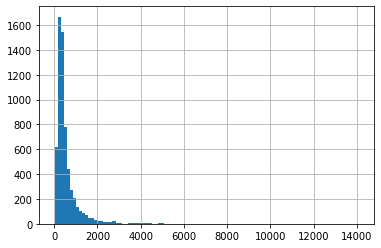

In [192]:
data2.Price.hist(bins = 100)
print()
data2.Price.skew()

In [193]:
corr_matrix = data2.corr(method='spearman')
corr_matrix

,Reviews,Ratings,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
Reviews,1.000000,-0.236396,0.221209,-0.001964,0.055514,-0.012549,0.105757,-0.019096,-0.106099,0.054828,-0.055098,-0.014230,-0.054720,0.064412
Ratings,-0.236396,1.000000,-0.298063,-0.012804,-0.065581,0.240790,-0.070561,-0.041858,0.090617,-0.111249,0.023037,0.002915,0.041757,-0.126580
Price,0.221209,-0.298063,1.000000,-0.093823,0.168208,-0.116849,0.117048,0.192154,-0.190717,0.098524,-0.091353,0.024289,-0.169109,0.136360
BookCategory_Action & Adventure,-0.001964,-0.012804,-0.093823,1.000000,-0.116806,-0.126288,-0.124759,-0.115941,-0.140687,-0.119616,-0.126054,-0.091094,-0.122026,-0.111043
"BookCategory_Arts, Film & Photography",0.055514,-0.065581,0.168208,-0.116806,1.000000,-0.097722,-0.096539,-0.089716,-0.108864,-0.092560,-0.097541,-0.070489,-0.094424,-0.085925
"BookCategory_Biographies, Diaries & True Accounts",-0.012549,0.240790,-0.116849,-0.126288,-0.097722,1.000000,-0.104376,-0.096999,-0.117701,-0.100073,-0.105459,-0.076211,-0.102089,-0.092901
BookCategory_Comics & Mangas,0.105757,-0.070561,0.117048,-0.124759,-0.096539,-0.104376,1.000000,-0.095825,-0.116277,-0.098862,-0.104182,-0.075289,-0.100853,-0.091776
"BookCategory_Computing, Internet & Digital Media",-0.019096,-0.041858,0.192154,-0.115941,-0.089716,-0.096999,-0.095825,1.000000,-0.108058,-0.091875,-0.096819,-0.069967,-0.093725,-0.085289
"BookCategory_Crime, Thriller & Mystery",-0.106099,0.090617,-0.190717,-0.140687,-0.108864,-0.117701,-0.116277,-0.108058,1.000000,-0.111483,-0.117483,-0.084900,-0.113729,-0.103493
BookCategory_Humour,0.054828,-0.111249,0.098524,-0.119616,-0.092560,-0.100073,-0.098862,-0.091875,-0.111483,1.000000,-0.099888,-0.072185,-0.096696,-0.087993


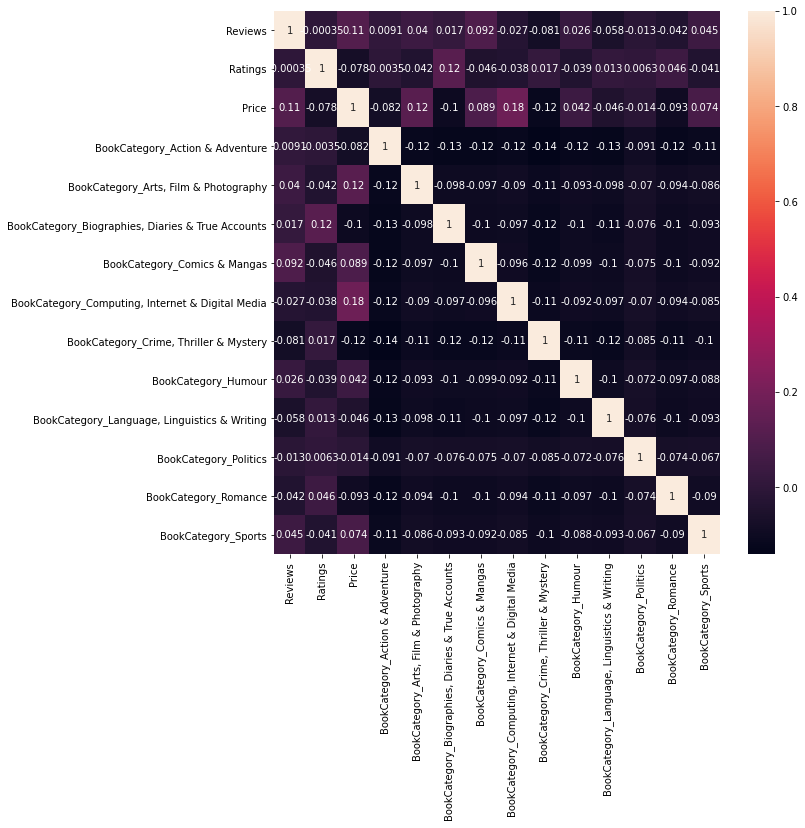

In [197]:
plt.figure(figsize=(10,10))

sns.heatmap(data2.corr(), annot=True)
plt.show()

In [198]:
corr_matrix.Price.sort_values(ascending=False)


Price                                                1.000000
Reviews                                              0.221209
BookCategory_Computing, Internet & Digital Media     0.192154
BookCategory_Arts, Film & Photography                0.168208
BookCategory_Sports                                  0.136360
BookCategory_Comics & Mangas                         0.117048
BookCategory_Humour                                  0.098524
BookCategory_Politics                                0.024289
BookCategory_Language, Linguistics & Writing        -0.091353
BookCategory_Action & Adventure                     -0.093823
BookCategory_Biographies, Diaries & True Accounts   -0.116849
BookCategory_Romance                                -0.169109
BookCategory_Crime, Thriller & Mystery              -0.190717
Ratings                                             -0.298063
Name: Price, dtype: float64

In [199]:
#Take targate variable into y
y = data2['Price']
X = data2.drop('Price',axis = 1)

In [201]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -430353.263797 (120862.730444)
ScaledLASSO: -430013.125928 (120809.161482)
ScaledEN: -433787.413727 (121452.458291)
ScaledKNN: -492995.919670 (119401.941121)
ScaledCART: -618755.282273 (166500.614609)
ScaledGBM: -425488.343876 (119874.527273)


In [203]:

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-423245.188498 (120801.091619) with: {'n_estimators': 50}
-425406.360820 (119884.291914) with: {'n_estimators': 100}
-431180.978564 (121426.121269) with: {'n_estimators': 200}
-438366.520519 (124220.214073) with: {'n_estimators': 300}
-449889.101786 (130385.903402) with: {'n_estimators': 400}
Best: -423245.188498 using {'n_estimators': 50}


In [204]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(rescaled_X_train, y)


GradientBoostingRegressor(n_estimators=50, random_state=21)

In [206]:
import pickle
# save the model to disk
filename = open('finalized_model.pkl','wb')
pickle.dump(model, filename)

In [220]:
y_pred_test = model.predict(data2t)


In [221]:
y_pred_test

array([524.1606275 , 531.56183899, 531.56183899, ..., 531.56183899,
       531.56183899, 531.56183899])

In [222]:
y_pred_test = pd.DataFrame(y_pred_test,columns=['Price'])
pd.DataFrame(y_pred_test,columns=['Price']).to_csv('submission.csv',index=None)